# F1 Qualifying vs Race Data Analysis

#### The following data analysis looks to compare 2 drivers, Max Verstappen (VER) and Oscar Piastri (PIA) across 2 races; mainly, Saudi Arabia, widely considered the fastest track on the F1 calendar, and Miami a track with very fast straights and very slow corners.

## This exercise will aim to look the following 5 areas:

### 1. Top-speed vs. average-speed

Question: Which driver hits a higher maximum speed on the straights, and which sustains a higher average speed over the whole lap?

Hypothesis: On their fastest laps, Verstappen will have a higher peak speed than Piastri (thanks to slipstream/DRS), but Piastri may edge him on average speed by carrying more corner momentum.
___
### 2. Corner entry & exit performance
Question: At key braking zones (e.g. Turns 1, 11 or 17), who brakes later or harder, and who carries more speed out of the corner?

Hypothesis: Verstappen will show sharper (later) braking peaks but Piastri will have a smoother throttle-to-brake transition and better exit speed in low-speed corners.
___
### 3. Throttle application style
Question: How do the throttle-percentage traces differ through corner exits? Does one driver “bury” the throttle earlier or more abruptly?

Hypothesis: Piastri will exhibit a more gradual ramp-up of throttle (for better traction), whereas Verstappen’s trace will spike more quickly toward 100 %.
___
### 4. Brake pressure/intensity comparison
Question: What do the brake-pressure traces tell us about each driver’s braking style—longer, lighter braking vs. shorter, heavier braking?

Hypothesis: Verstappen, with his experience, will show shorter braking distances and higher peak brake pressures; Piastri may brake earlier and more gently.
___
### 5. Speed Comaparison - Top 5 laps.
Question: How do the two drivers top 5 laps compare?

Hypotheses: Race fastest lap will have a noticeably lower top speed (due to fuel) and a more conservative throttle map. Brake pressures in race trim will be lower and entries slightly earlier (for tire preservation).

In [1]:
import fastf1 as ff1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#enable fastf1 cache
ff1.Cache.enable_cache('cache')  # Enable caching for faster data retrieval

In [3]:
# Load the session data
quali = ff1.get_session(2025, 'Saudi Arabian Grand Prix', 'Qualifying')

In [4]:
# Load lap data
quali.load(laps=True, telemetry=True)

core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '81', '63', '16', '12', '55', '44', '22', '10', '4', '23', '30', '14', '6', '87', '18', '7', '27', '31', '5']


In [5]:
laps = quali.laps

In [6]:
# Get telemetry data for the fastest lap
fastest_ver = laps.pick_drivers('VER').pick_fastest()
fastest_pias = laps.pick_drivers('PIA').pick_fastest()

# Get the speed data
telemetry = fastest.get_telemetry()


NameError: name 'fastest' is not defined

In [ ]:
#Get laps data for Verstapppen and Piastri
laps_ver = laps.pick_drivers('VER')
laps_pias = laps.pick_drivers('PIA')

In [ ]:
#Extract laps data for both drivers
fastest_ver = laps_ver.pick_fastest()
fastest_pias = laps_pias.pick_fastest()

In [ ]:
# Get the speed data for both drivers
telemetry_ver = fastest_ver.get_car_data().add_distance()
telemetry_pias = fastest_pias.get_car_data().add_distance()


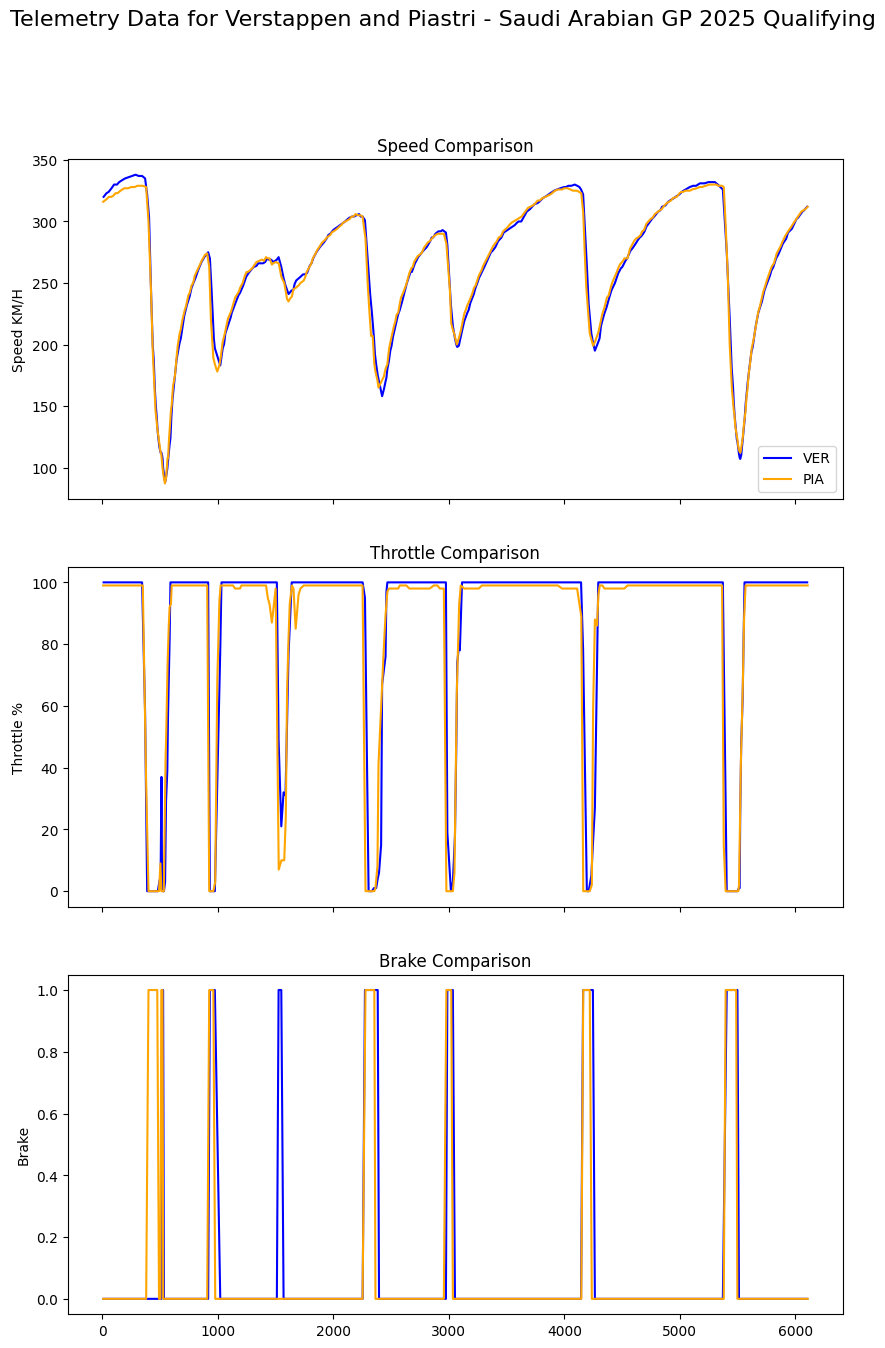

In [ ]:
# Plot the speed data for both drivers
fig, ax = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
fig.suptitle('Telemetry Data for Verstappen and Piastri - Saudi Arabian GP 2025 Qualifying', fontsize=16)

ax[0].plot(telemetry_ver['Distance'], telemetry_ver['Speed'], label='VER', color='blue')
ax[0].plot(telemetry_pias['Distance'], telemetry_pias['Speed'], label='PIA', color='orange')
ax[0].set(ylabel='Speed KM/H', title='Speed Comparison')
ax[0].legend(loc='lower right')

ax[1].plot(telemetry_ver['Distance'], telemetry_ver['Throttle'], label='VER', color='blue')
ax[1].plot(telemetry_pias['Distance'], telemetry_pias['Throttle'], label='PIA', color='orange')
ax[1].set(ylabel='Throttle %', title='Throttle Comparison')

ax[2].plot(telemetry_ver['Distance'], telemetry_ver['Brake'], label='VER', color='blue')
ax[2].plot(telemetry_pias['Distance'], telemetry_pias['Brake'], label='PIA', color='orange')
ax[2].set(ylabel='Brake', title='Brake Comparison')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()

plt.show()

In [ ]:
ff1.Cache.enable_cache('cache/')

In [ ]:
race = ff1.get_session(2025, 'Saudi Arabia', 'R')
race.load(laps=True, telemetry=True)

core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '1', '16', '4', '63', '12', '44', '55', '23', '6', '14', '30', '87', '31', '27', '18', '7', '5', '22', '10']


In [ ]:
laps = race.laps

In [ ]:
laps_ver = laps.pick_drivers('VER')
laps_pias = laps.pick_drivers('PIA')

In [ ]:
fastest_ver = laps_ver.pick_fastest()
fastest_pias = laps_pias.pick_fastest()

In [ ]:
telemetry_ver = fastest_ver.get_telemetry().add_distance()
telemetry_pias = fastest_pias.get_telemetry().add_distance()

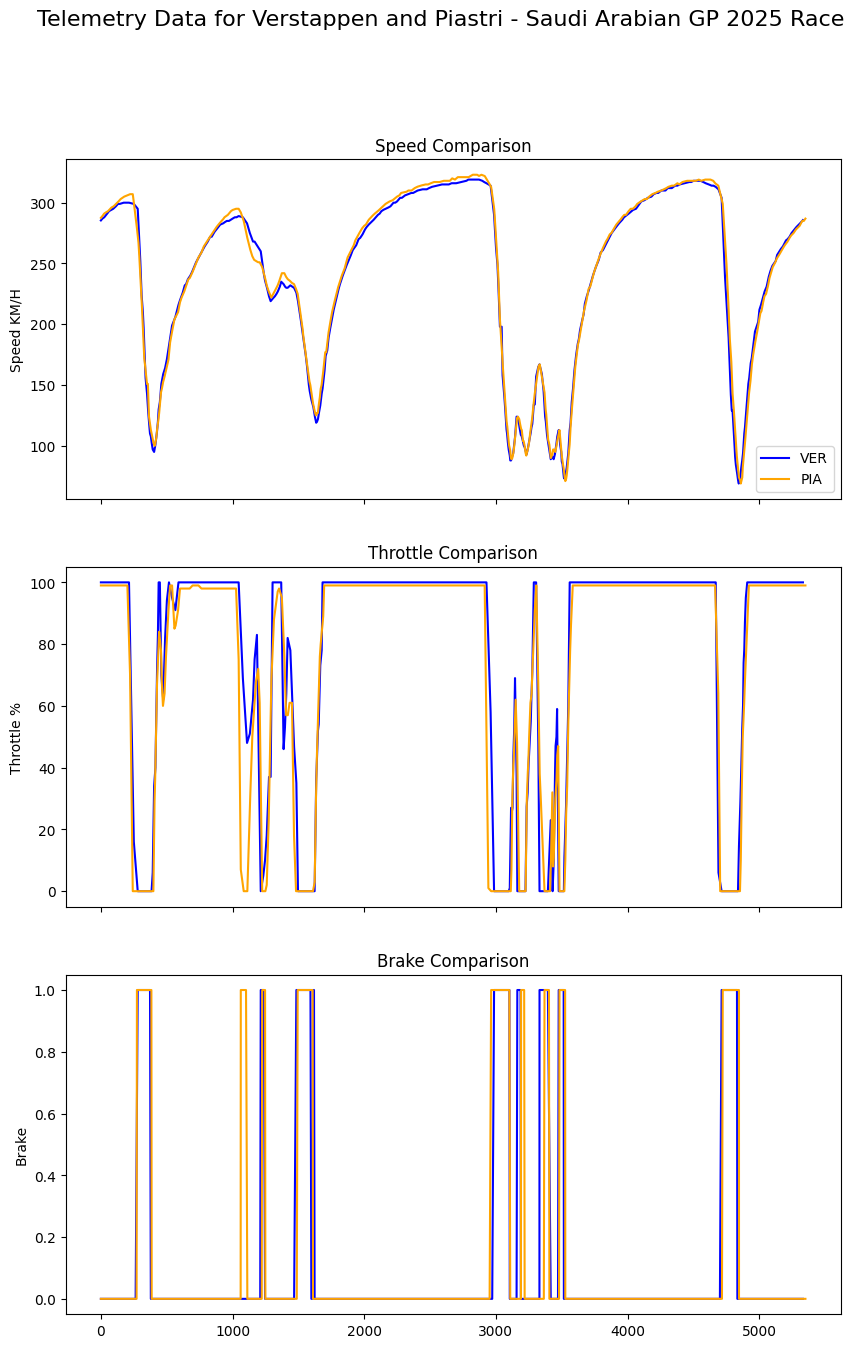

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
fig.suptitle('Telemetry Data for Verstappen and Piastri - Saudi Arabian GP 2025 Race', fontsize=16)

ax[0].plot(telemetry_ver['Distance'], telemetry_ver['Speed'], label='VER', color='blue')
ax[0].plot(telemetry_pias['Distance'], telemetry_pias['Speed'], label='PIA', color='orange')
ax[0].set(ylabel='Speed KM/H', title='Speed Comparison')
ax[0].legend(loc='lower right')

ax[1].plot(telemetry_ver['Distance'], telemetry_ver['Throttle'], label='VER', color='blue')
ax[1].plot(telemetry_pias['Distance'], telemetry_pias['Throttle'], label='PIA', color='orange')
ax[1].set(ylabel='Throttle %', title='Throttle Comparison')

ax[2].plot(telemetry_ver['Distance'], telemetry_ver['Brake'], label='VER', color='blue')
ax[2].plot(telemetry_pias['Distance'], telemetry_pias['Brake'], label='PIA', color='orange')
ax[2].set(ylabel='Brake', title='Brake Comparison')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()

plt.show()

In [ ]:
ff1.Cache.enable_cache('cache/')

In [ ]:
quali = ff1.get_session(2025, 'Miami', 'Q')
quali.load(laps=True, telemetry=True)
                        

core           INFO 	Loading data for Miami Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '12', '81', '63', '55', '23', '16', '31', '22', '6', '44', '5', '7', '30', '27', '14', '10', '18', '87']


In [ ]:
laps = quali.laps

In [ ]:
laps_ver = laps.pick_drivers('VER')
laps_pias = laps.pick_drivers('PIA')


In [ ]:
fastest_ver = laps_ver.pick_fastest()
fastest_pias = laps_pias.pick_fastest()

In [ ]:
telemetry_ver = fastest_ver.get_car_data().add_distance()
telemetry_pias = fastest_pias.get_car_data().add_distance()

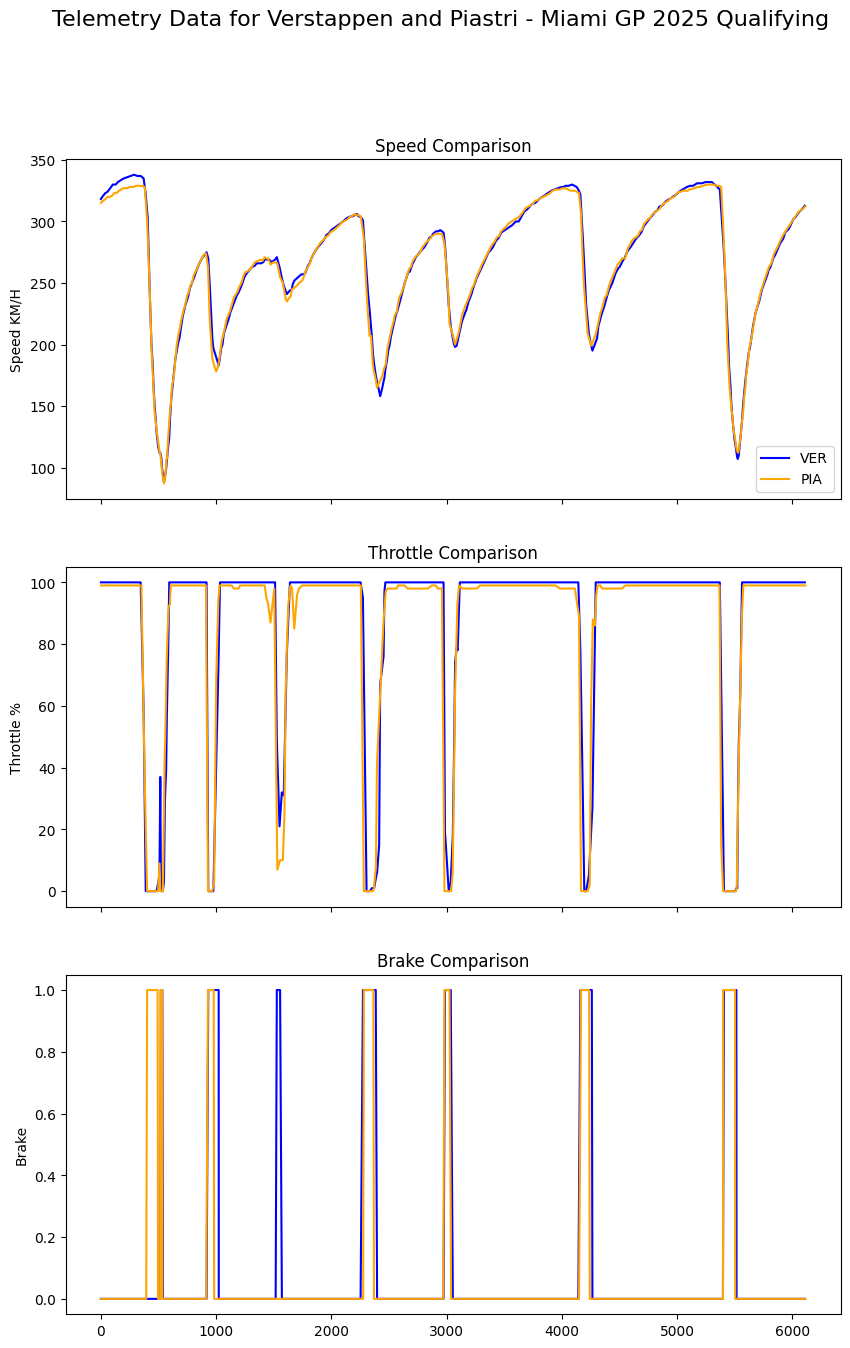

In [15]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
fig.suptitle('Telemetry Data for Verstappen and Piastri - Miami GP 2025 Qualifying', fontsize=16)

ax[0].plot(telemetry_ver['Distance'], telemetry_ver['Speed'], label='VER', color='blue')
ax[0].plot(telemetry_pias['Distance'], telemetry_pias['Speed'], label='PIA', color='orange')
ax[0].set(ylabel='Speed KM/H', title='Speed Comparison')
ax[0].legend(loc='lower right')

ax[1].plot(telemetry_ver['Distance'], telemetry_ver['Throttle'], label='VER', color='blue')
ax[1].plot(telemetry_pias['Distance'], telemetry_pias['Throttle'], label='PIA', color='orange')
ax[1].set(ylabel='Throttle %', title='Throttle Comparison')

ax[2].plot(telemetry_ver['Distance'], telemetry_ver['Brake'], label='VER', color='blue')
ax[2].plot(telemetry_pias['Distance'], telemetry_pias['Brake'], label='PIA', color='orange')
ax[2].set(ylabel='Brake', title='Brake Comparison')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()

plt.show()

In [14]:
ff1.Cache.enable_cache('cache/')

In [12]:
race = ff1.get_session(2025, 'Miami', 'R')
race.load(laps=True, telemetry=True)

core           INFO 	Loading data for Miami Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 81 completed the race distance 00:00.036000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['81', '4', '63', '1', '23', '12', '16', '44', '55', '22', '6', '31',

In [13]:
laps = race.laps

In [9]:
laps_ver = laps.pick_drivers('VER')
laps_pias = laps.pick_drivers('PIA')

In [10]:
fastest_ver = laps_ver.pick_fastest()
fastest_pias = laps_pias.pick_fastest()

In [7]:
telemetry_ver = fastest_ver.get_telemetry().add_distance()
telemetry_pias = fastest_pias.get_telemetry().add_distance()

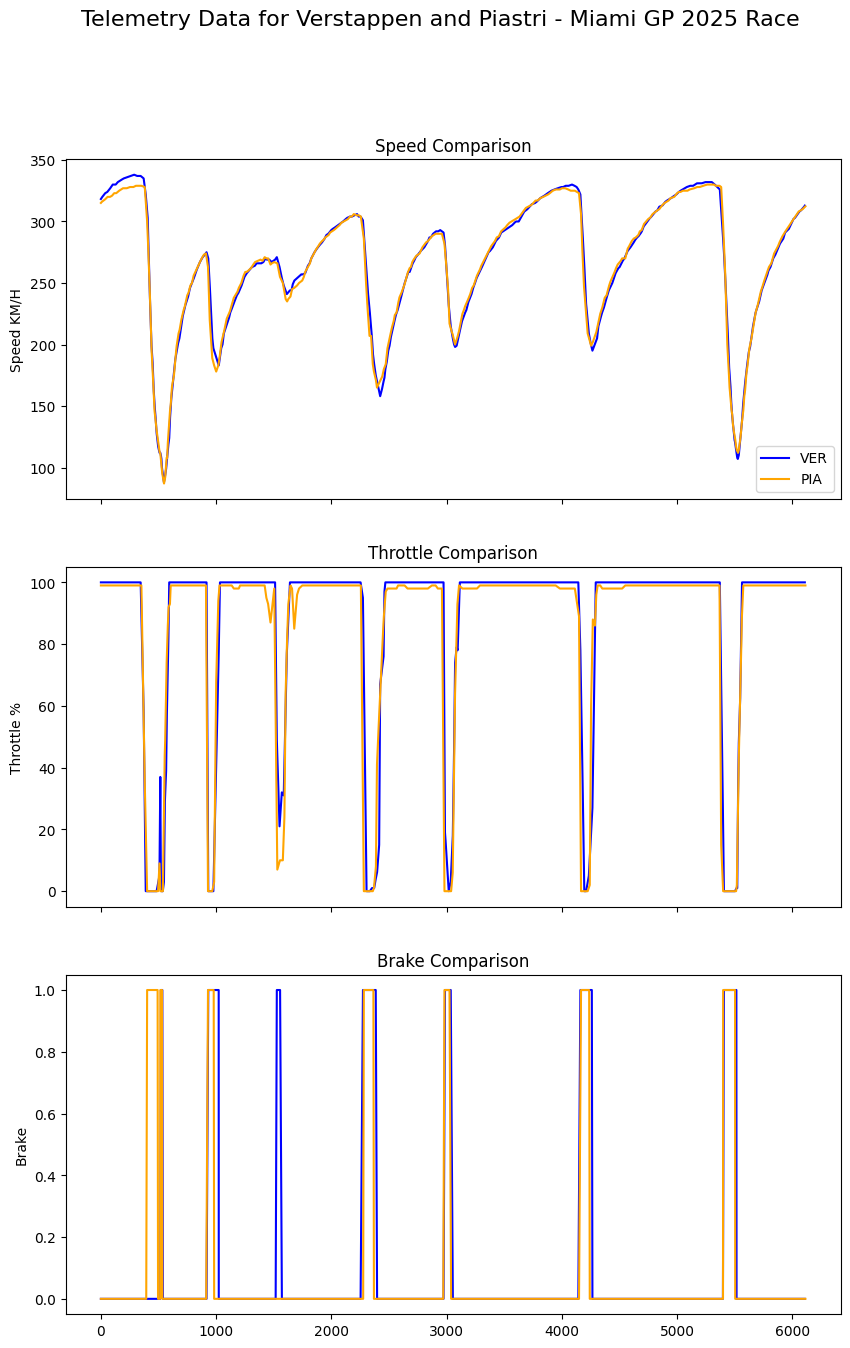

In [16]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
fig.suptitle('Telemetry Data for Verstappen and Piastri - Miami GP 2025 Race', fontsize=16)

ax[0].plot(telemetry_ver['Distance'], telemetry_ver['Speed'], label='VER', color='blue')
ax[0].plot(telemetry_pias['Distance'], telemetry_pias['Speed'], label='PIA', color='orange')
ax[0].set(ylabel='Speed KM/H', title='Speed Comparison')
ax[0].legend(loc='lower right')

ax[1].plot(telemetry_ver['Distance'], telemetry_ver['Throttle'], label='VER', color='blue')
ax[1].plot(telemetry_pias['Distance'], telemetry_pias['Throttle'], label='PIA', color='orange')
ax[1].set(ylabel='Throttle %', title='Throttle Comparison')

ax[2].plot(telemetry_ver['Distance'], telemetry_ver['Brake'], label='VER', color='blue')
ax[2].plot(telemetry_pias['Distance'], telemetry_pias['Brake'], label='PIA', color='orange')
ax[2].set(ylabel='Brake', title='Brake Comparison')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()

plt.show()

In [17]:
race = ff1.get_session(2025, 'Saudi Arabia', 'R')
race.load(laps=True, telemetry=True)

core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '1', '16', '4', '63', '12', '44', '55', '23', '6', '14', '30', '87', '31', '27', '18', '7', '5', '22', '10']


In [18]:
laps = race.laps

  Driver   MeanSpeed   StdSpeed  MeanThrottle  StdThrottle  MeanBrake  \
0    VER  238.319420  62.332612     75.794337    38.705580   0.150960   
1    PIA  237.654411  62.814096     74.277070    38.576912   0.140688   

   StdBrake  
0  0.358061  
1  0.347749  


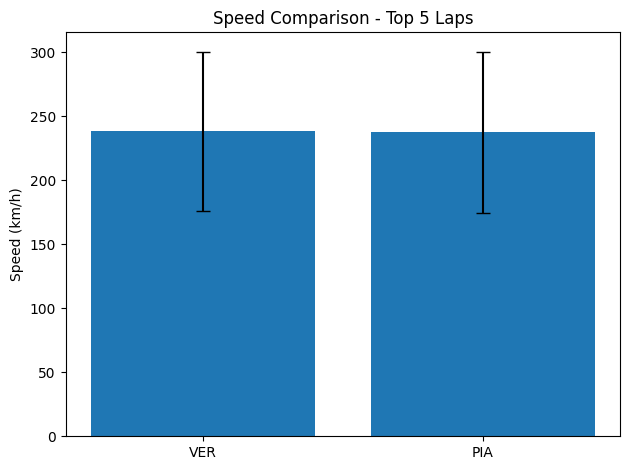

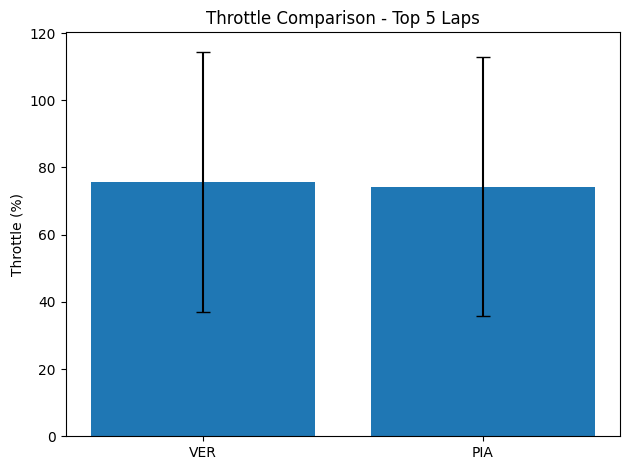

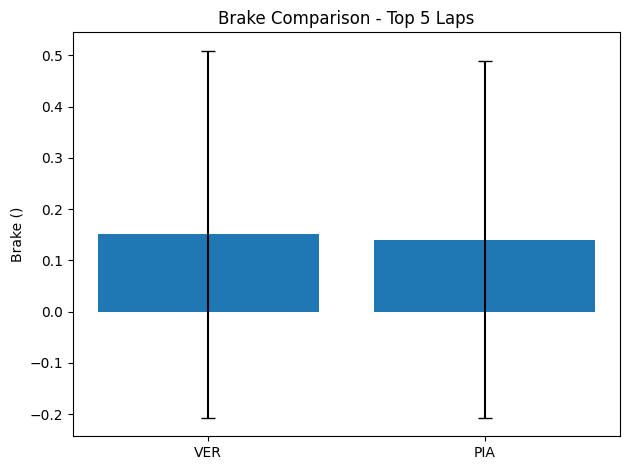

In [35]:
drivers = ['VER', 'PIA']
summary = []

for drv in drivers:
    drv_laps = laps.pick_drivers(drv)
    top5 = drv_laps.nsmallest(5, 'LapTime')

    tel_concat = pd.concat([
        laps.get_telemetry().add_distance()[['Speed', 'Throttle', 'Brake']]
        for _, laps in top5.iterlaps()
    ])

    summary.append({
        'Driver': drv,
        'MeanSpeed': tel_concat['Speed'].mean(),
        'StdSpeed': tel_concat['Speed'].std(),
        'MeanThrottle': tel_concat['Throttle'].mean(),
        'StdThrottle': tel_concat['Throttle'].std(),
        'MeanBrake': tel_concat['Brake'].mean(),
        'StdBrake': tel_concat['Brake'].std()
    })

summary_df = pd.DataFrame(summary)
print(summary_df)

metrics = [
    ('Speed', 'km/h'),
    ('Throttle', '%'),
    ('Brake', ''),
]

for metric, unit in metrics:
    fig, ax = plt.subplots()
    mean_col = f'Mean{metric}'
    std_col = f'Std{metric}'

    ax.bar(
        summary_df['Driver'],
        summary_df[mean_col],
        yerr=summary_df[std_col],
        capsize=5
    )

    ax.set_ylabel(f'{metric} ({unit})')
    ax.set_title(f'{metric} Comparison - Top 5 Laps')
    plt.tight_layout()
    plt.show()

# Conclusion

## 1. Top Speed vs Average Speed

Verstappen tends to have the best pace overall compared to Piastri, however, Verstappen fares better in Qualifying than Piastri, who excels in race pace. There is a question to be answered here, whether Piastri and McLaren are even qualifying at the peak of their car's capabilities.


## 2. Corner Entry & Exit Performance

Verstappen is known for late-breaking and it is evident in the graphs. He's hitting the brakes quite late compared to Piastri, who is aiming to achieve a greater and faster exit, especially outside of the slow speed corners. We have one driver who brakes late, potentially sacrificing a good exit, vs a driver who optimises their braking strategy and prioritises a good and clean exit.

## 3. Throttle Application Style

It appears Verstappen tends to go 0-100% real quick on throttle application, aiming to maximise speed and distance, at the cost of tyre management, while Piastri is aiming for better grip and traction management at the cost of speed and distance.

## 4. Brake pressure/intensity comparison

Related to point 2, Verstappen has a history of braking late, and the brake pressure graphs show this while Piastri's is almost the opposite. Late braking suggests a very aggressive driving style, intending to maximise the straight as much as possible.

## 5. Speed Comparison - Top 5 Laps

From the analysis, we can see that Verstappen is using just a bit more throttle than Piastri and more of the brakes. This again fits the narrative that Verstappen is a late braker, and uses more of the brakes to brake quicker than Piastri. 

